# (6) Practice Learning Activity: Connect tuned models to web applications
##### (GenAI Life Cycle Phase 6: Deployment self-practice)


#### **Case Scenario:**  
>  
> CoffeePro’s virtual coffee concierge is now ready for deployment. The final step in its development cycle is integrating the AI-powered assistant into a web application where customers can interact with it in real-time.  
>  
> As the AI developer, your role is to bridge the tuned model with a web-based interface that allows users to receive coffee recommendations, brewing guidance, and personalized insights. This requires understanding how different layers of web applications work together, from frontend interfaces to backend logic and database connections.  
>  
> Additionally, the system must seamlessly incorporate Retrieval-Augmented Generation (RAG) to provide enriched responses based on CoffeePro’s extensive dataset of coffee beans, roasters, and brewing techniques. Ensuring smooth interaction between the LLM and external data sources is essential for delivering an intelligent and contextually aware virtual assistant.  
>  
> Your Tasks:  
>  
> (a) Understand how the different layers of web applications work in a virtual agent  
> Analyze how the frontend, backend, and database components interact to support the AI-powered assistant. Ensure that the virtual concierge can process user queries and return well-structured responses.  
>  
> (b) Connect LLMs and the necessary logic and corpus for RAG  
> Implement the link between the fine-tuned LLM and the supporting retrieval system to enhance responses with relevant knowledge. Ensure that the virtual agent can access, process, and present up-to-date information dynamically.  
>  
> By the end of this activity, you will have developed a functional web-based AI concierge that integrates GenAI capabilities with structured data, enabling seamless user interactions.  


---

### Pre-requisites: 
- Navigate to vs code <a href="../learning-files/ailtk-running-code-pla6.ipynb" target="_blank">(Click here to open the sample web app folder in Visual Studio Code)</a>. Code adapted from Google IDX official Gemini and Python Flask templates available at <a href="[../learning-files/ailtk-running-code-pla6.ipynb](https://github.com/project-idx/templates)" target="_blank">Google IDX's official GitHub repo</a>.

#### (a) Understand how the different layers of web applications work in a virtual agent

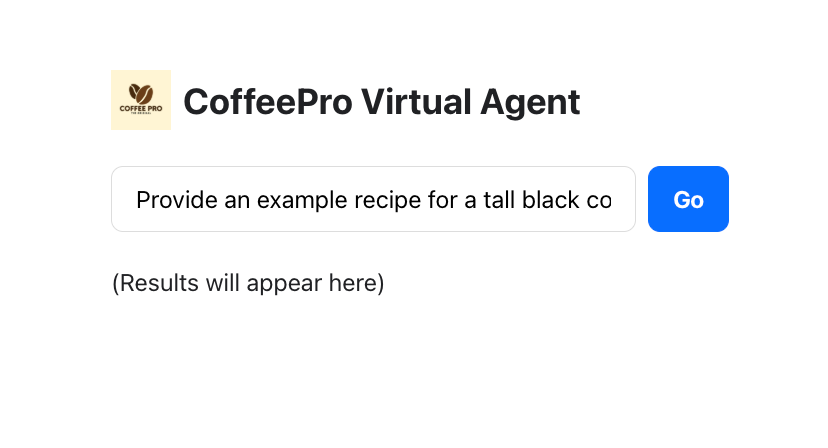

This Practice Learning Activity uses a sample web application for Coffee Pro's Virtual Agent to illustrate the concepts.  We can examine this application by considering its three main layers:

1. **The Frontend** - The chat interface where users input queries and see responses. Its key files include:
    - The `index.html` defines the chat window structure while the `styles.css` file defines the web page's designs and layouts.
        - User Input Field & Send Button

            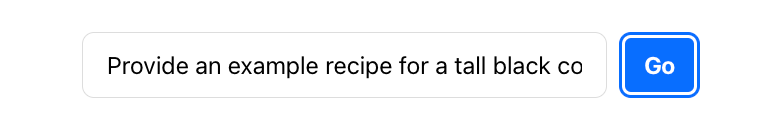
        - Displaying Chatbot Responses

            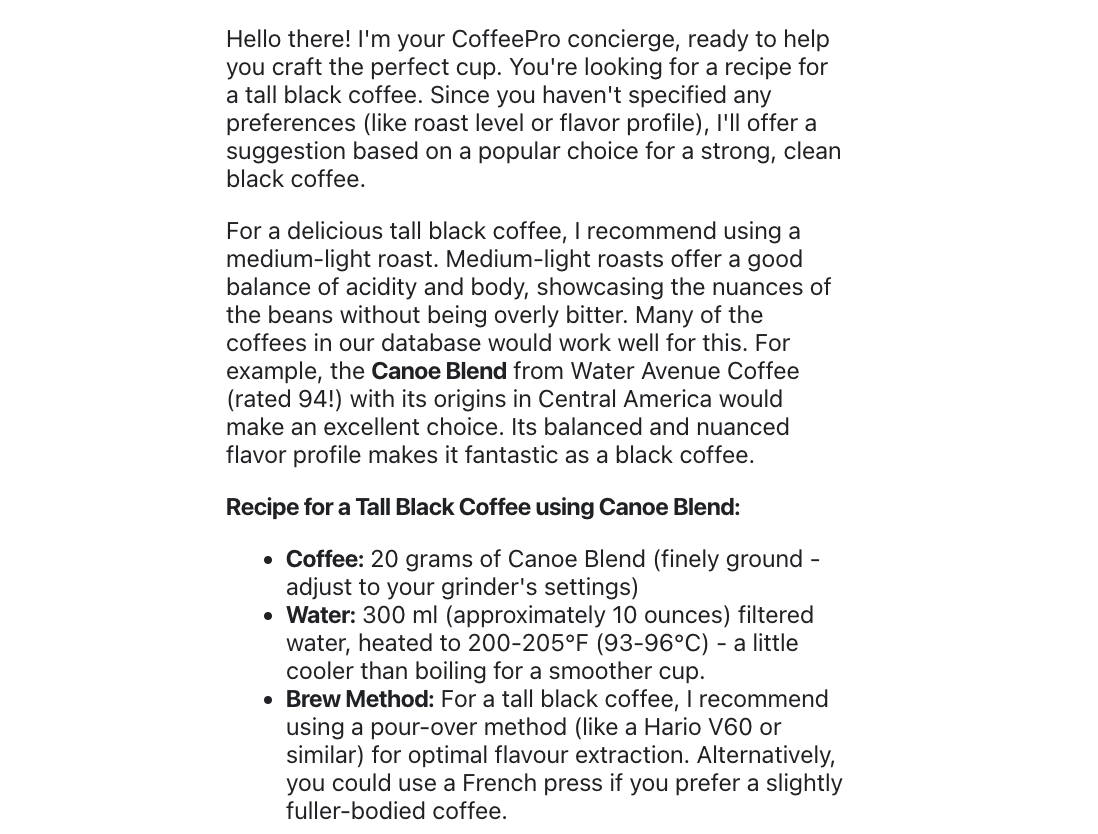
        -  Feedback Mechanism (Thumbs-Up / Thumbs-Down)
            - Users can rate responses to help improve chatbot performance and accuracy.

            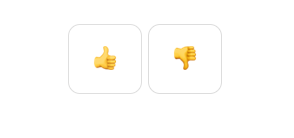

            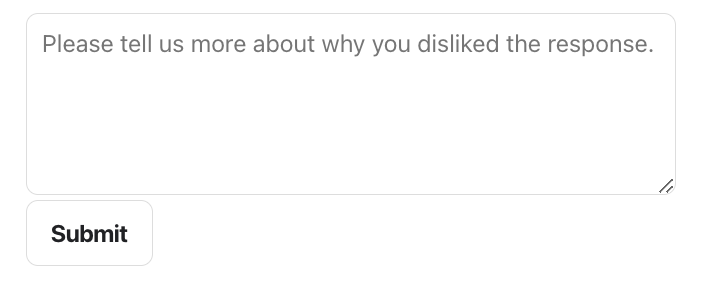
    - The `main.js` - Handles the dynamic display of the virtual agent's responses and acts as the intermediary between the user interface (HTML, CSS) and the backend (`main.py`). It uses helper functions from the `gemini-api.js` file to give the web app the dynamic appearance of the virtual agent's responses.
    - The file `gemini-api.js` defines two helper functions for formatting requests to the Gemini API.
        - The helper function `streamGemini()` calls the given Gemini model with the text, streaming output (as a generator function).
        - The helper function `streamResponseChunks()` treams text output chunks from a fetch() response.
3. **The Backend** - The data storage layer for logging interactions and feedback  
    - When a user sends a message, the `main.py` file receives it from the middleware formatted in json so that can be sent to the Gemini API. The function forwards it to the Gemini AI model to generate a response. The response is then streamed back to the frontend for display in the chat window.
    - `main.py` - Handles requests to the Gemini API and feedback storage in MySQL
        - Imports: The code imports necessary libraries for interacting with the Gemini API, handling web requests, and working with databases.
        - RAGOrchestrator Class: This class manages the retrieval of relevant information from a corpus of documents to augment user queries before sending them to the Gemini model.
        - Flask App Setup: This section configures the Flask application, initializes the Gemini model, and sets up routes for handling user requests and feedback.
        - API Endpoints: `/api/generate` Handles user queries, interacts with the Gemini model, and streams the generated response back to the client. `/api/submit-feedback`:` Receives and processes user feedback on the generated responses, storing it in a database.
        - Feedback Handling: The code includes functionality to collect user feedback (thumbs-up/down, text) and store it in a database for future analysis.

#### (b) Connect LLMs and the necessary logic and corpus for RAG

1. Locate your corpus pickle file <a href="../learning-files/ailtk-open-ailtkwebapp-directory.ipynb" target="_blank">Opens the file manager #TODO</a>

2. Place your API key

3. Create a new terminal by navigating to `Terminal > New Terminal`

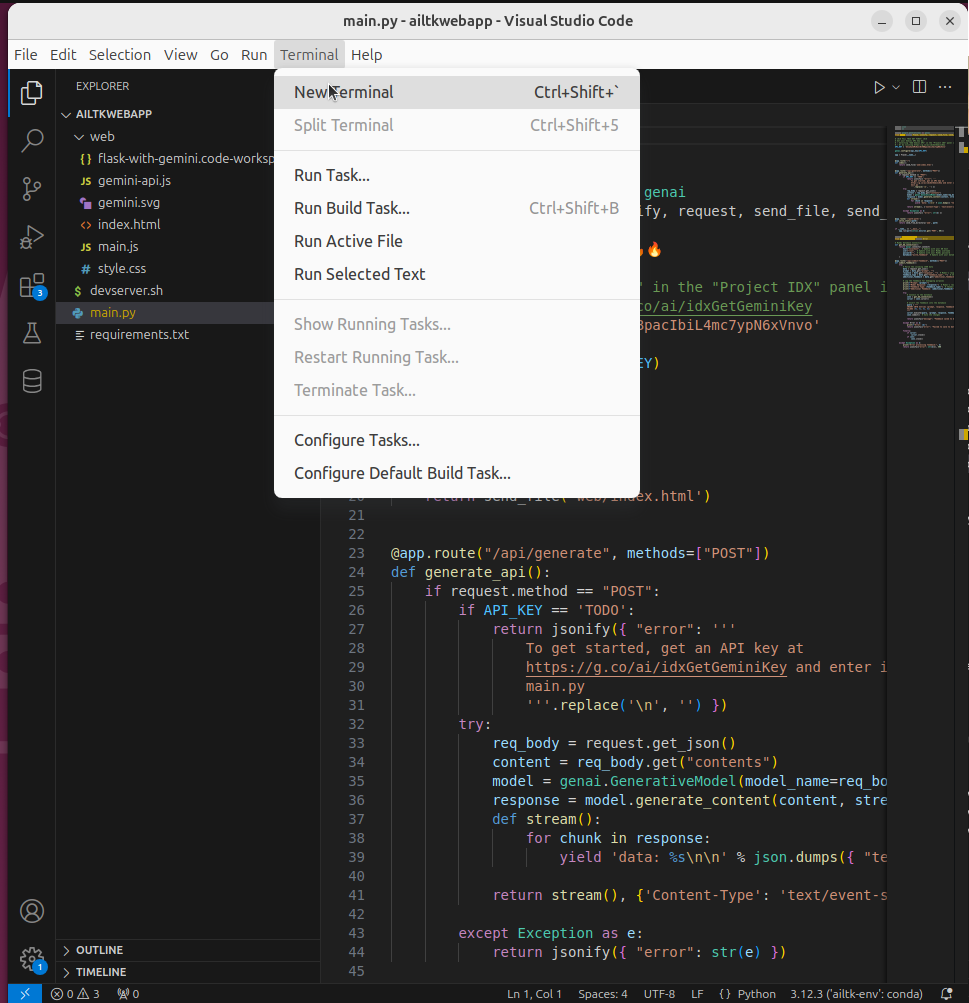

- It should open in the directory of the web app.

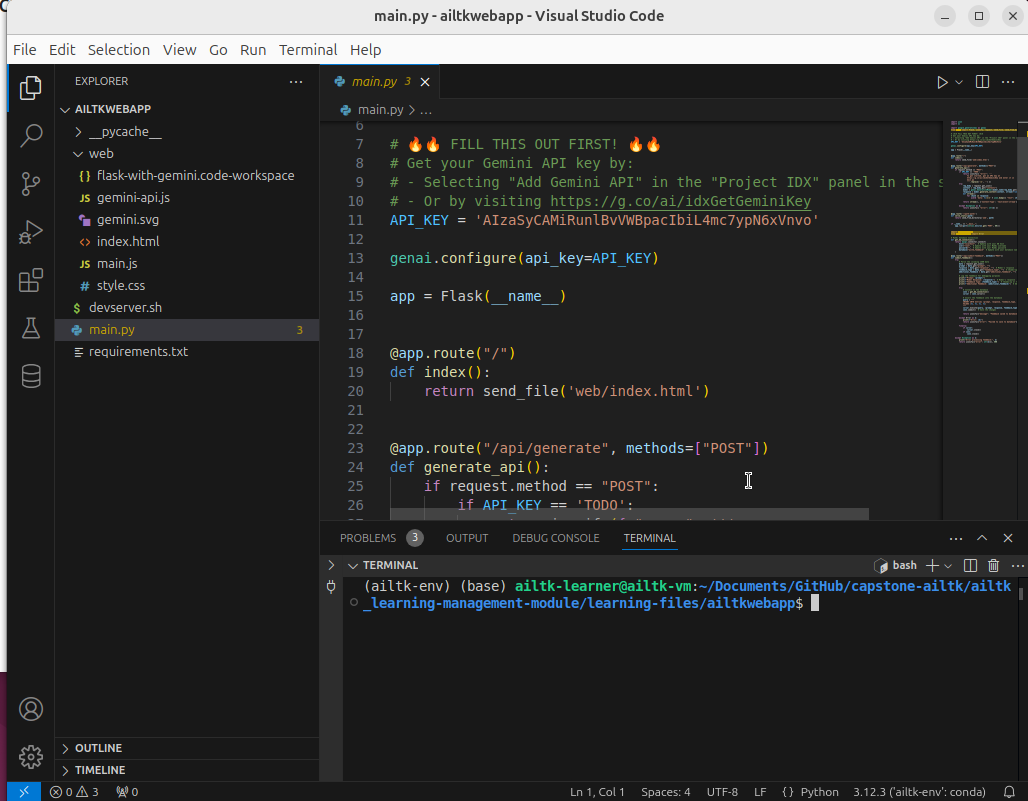

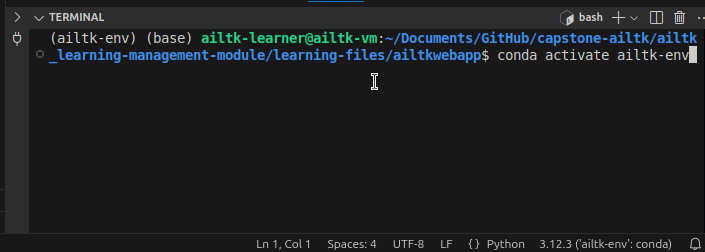

4. Enter `flask --app main.py run` in the Terminal and press Enter to launch the web app.

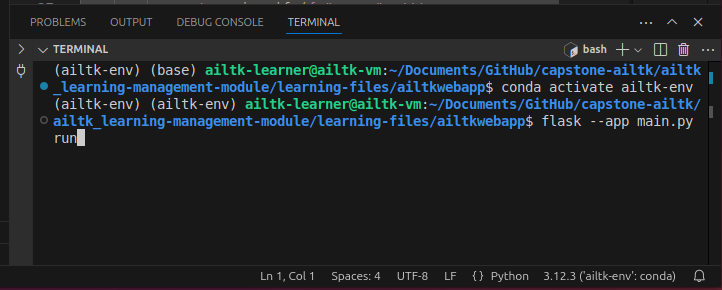

5. Proceed to [localhost](http://127.0.0.1:5000)  or `Ctrl + Click` to follow the link to the development server. 

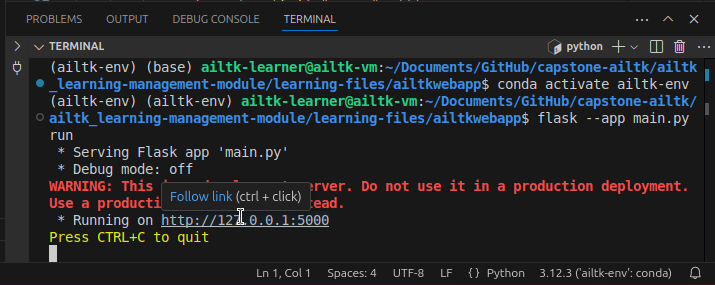

6. Try interacting with the virtual agent! Try giving feedback on one of the responses as well. 

7. The feedback is stored in a MySQL database. You can try to access it using the Python code below:

In [3]:
from sqlalchemy import create_engine, text

# Create SQLAlchemy engine
DATABASE_URL = "mysql+mysqlconnector://root:@localhost/ailtk_feedback"
engine = create_engine(DATABASE_URL)


try:
    with engine.connect() as connection:
        # Get total number of rows
        total_rows = connection.execute(text("SELECT COUNT(*) FROM entries")).scalar()

        # Get the head of the table (first 5 rows)
        result = connection.execute(text("SELECT * FROM entries LIMIT 5"))
        head_data = result.fetchall()
        column_names = result.keys()  # Get column names

    # Print the total rows
    print(f"Total rows: {total_rows}\n")

    # Print the table head with column names
    if head_data:
        print("Table Head:")
        print("\t".join(column_names))  # Print column headers
        for row in head_data:
            print("\t".join(str(col) for col in row))  # Print row data
    else:
        print("No data found.")


except Exception as e:
    print(f"Error: {e}")



Total rows: 2

Table Head:
id	prompt	response	feedback_type	additional_feedback	created_at
2	Provide an example recipe for a tall black coffee	<p>There's no recipe for a tall black coffee beyond the act of brewing it!  A tall black coffee is simply a serving of brewed coffee without any additions like milk, cream, sugar, or flavorings.  The "tall" refers to the size, typically around 12-16 ounces, depending on the coffee shop.</p>
<p>Here's how you'd make one at home:</p>
<p><strong>Ingredients:</strong></p>
<ul>
<li>Your preferred coffee beans (whole bean is best, ground is fine too)</li>
<li>Water (filtered is best)</li>
</ul>
<p><strong>Equipment:</strong></p>
<ul>
<li>Coffee maker (drip, French press, pour over, Aeropress, etc. – your preference!)</li>
<li>Grinder (if using whole beans)</li>
<li>Mug</li>
</ul>
<p><strong>Instructions:</strong></p>
<ol>
<li><strong>Grind your beans:</strong> If using whole beans, grind them to a medium-fine consistency appropriate for your brewing m

 > **Disclaimer:** This self-learning toolkit provides a foundational understanding of building virtual agents and LLM-related web applications. It does not delve into the complexities of deploying these applications in a production environment. For in-depth guidance on deployment strategies, best practices, and considerations for production environments, please refer to the following resources:
 > - [Python Anywhere for Web Hosting](https://www.pythonanywhere.com/)
 > - [Google Firebase and Cloud for Web Hosting](https://developers.google.com/idx/guides/deploy-app)

Great job! You've now successfully explored how to deploy a tuned large language model (LLM) into a web application, ensuring seamless interaction between the AI assistant and users. By integrating Retrieval-Augmented Generation (RAG), handling API requests, and managing data flow across different layers of a web application, you've gained valuable skills in making AI-powered systems functional and accessible in real-world scenarios. This process has strengthened your understanding of how frontend, backend, and database components work together to support AI-driven interactions. In the next phase, you’ll focus on monitoring and improving your virtual agent’s performance by analyzing user feedback, refining responses, and ensuring continuous enhancements for better engagement and reliability.

#### [ Back to Learning Instructions 6](../learning-instructions-6.ipynb)